### Load Libraries


In [14]:
import pandas as pd

# Set file path
file_path = r"C:\Users\Angel Adaambiik\Desktop\Edward\Sales data\Sales_data.csv"

# Load dataset
df = pd.read_csv(file_path)

# Preview
df.head()


,Transaction ID,Date,Product Category,Product Name,Number of Products Sold,Unit Price,Sales Amount,Region,Payment Method,Marketing Expenditure
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card,174.91
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal,72.53
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card,25.87
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card,7.03
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal,5.90


In [15]:
# Convert Date to datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [16]:
# Check for missing values
df.isnull().sum()

Transaction ID             0
Date                       0
Product Category           0
Product Name               0
Number of Products Sold    0
Unit Price                 0
Sales Amount               0
Region                     0
Payment Method             0
Marketing Expenditure      0
dtype: int64

In [17]:
# Confirm structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Transaction ID           240 non-null    int64         
 1   Date                     240 non-null    datetime64[ns]
 2   Product Category         240 non-null    object        
 3   Product Name             240 non-null    object        
 4   Number of Products Sold  240 non-null    int64         
 5   Unit Price               240 non-null    float64       
 6   Sales Amount             240 non-null    float64       
 7   Region                   240 non-null    object        
 8   Payment Method           240 non-null    object        
 9   Marketing Expenditure    240 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 18.9+ KB


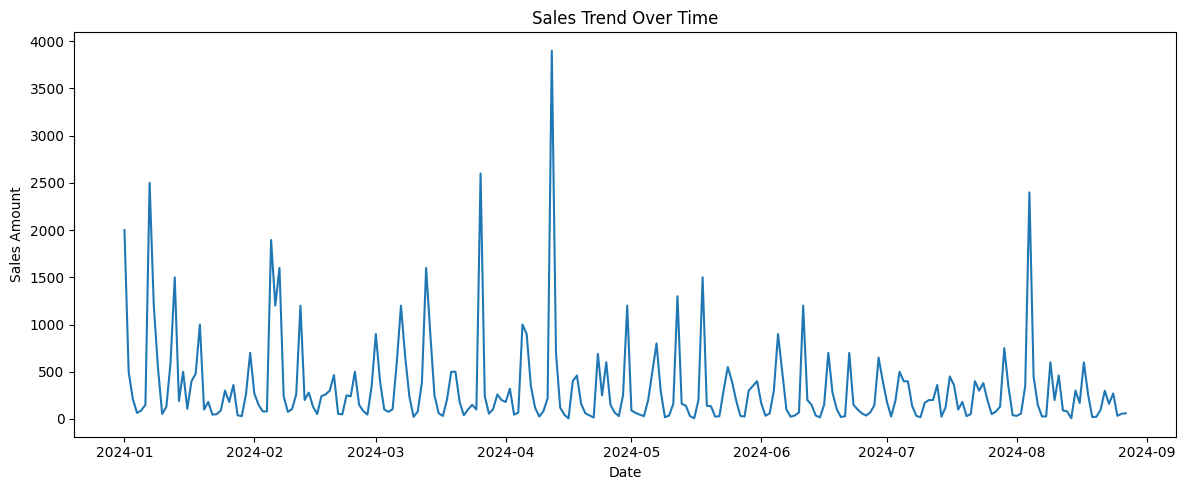

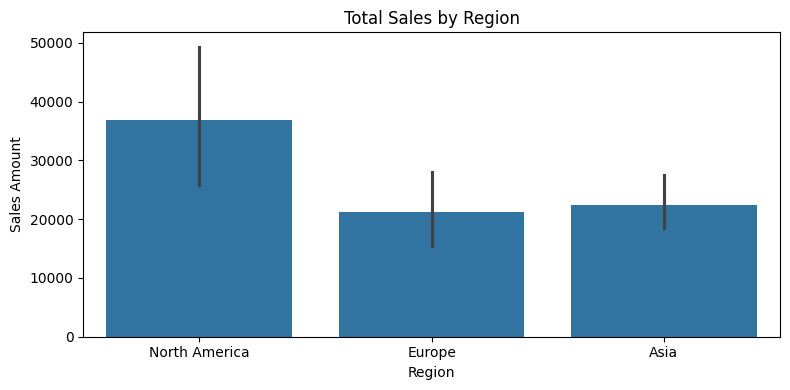

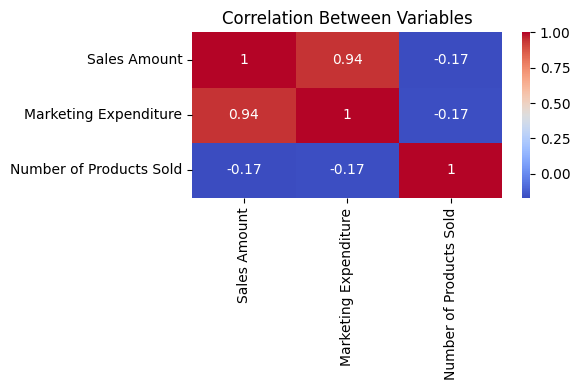

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sales trend over time
df = df.sort_values('Date')
plt.figure(figsize=(12,5))
plt.plot(df['Date'], df['Sales Amount'])
plt.title("Sales Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Sales Amount")
plt.tight_layout()
plt.show()

# Sales by Region
plt.figure(figsize=(8,4))
sns.barplot(data=df, x='Region', y='Sales Amount', estimator=sum)
plt.title("Total Sales by Region")
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(6,4))
sns.heatmap(df[['Sales Amount', 'Marketing Expenditure', 'Number of Products Sold']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Variables")
plt.tight_layout()
plt.show()


In [14]:
# Assuming df is already loaded and cleaned
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

def prepare_data(df):
    X = df[['Marketing Expenditure', 'Number of Products Sold']].values
    y = df['Sales Amount'].values
    return train_test_split(X, y, test_size=0.2, random_state=42)

def run_regression(X_train, X_test, y_train, y_test):
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print("Intercept:", model.intercept_)
    print("Coefficients:", model.coef_)
    print("R² Score:", r2_score(y_test, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

    return model

# ✅ Add these lines to execute
X_train, X_test, y_train, y_test = prepare_data(df)
model = run_regression(X_train, X_test, y_train, y_test)


Intercept: 12.800453294215345
Coefficients: [10.18913821 -1.84373038]
R² Score: 0.7943306710819649
RMSE: 193.84664299941176


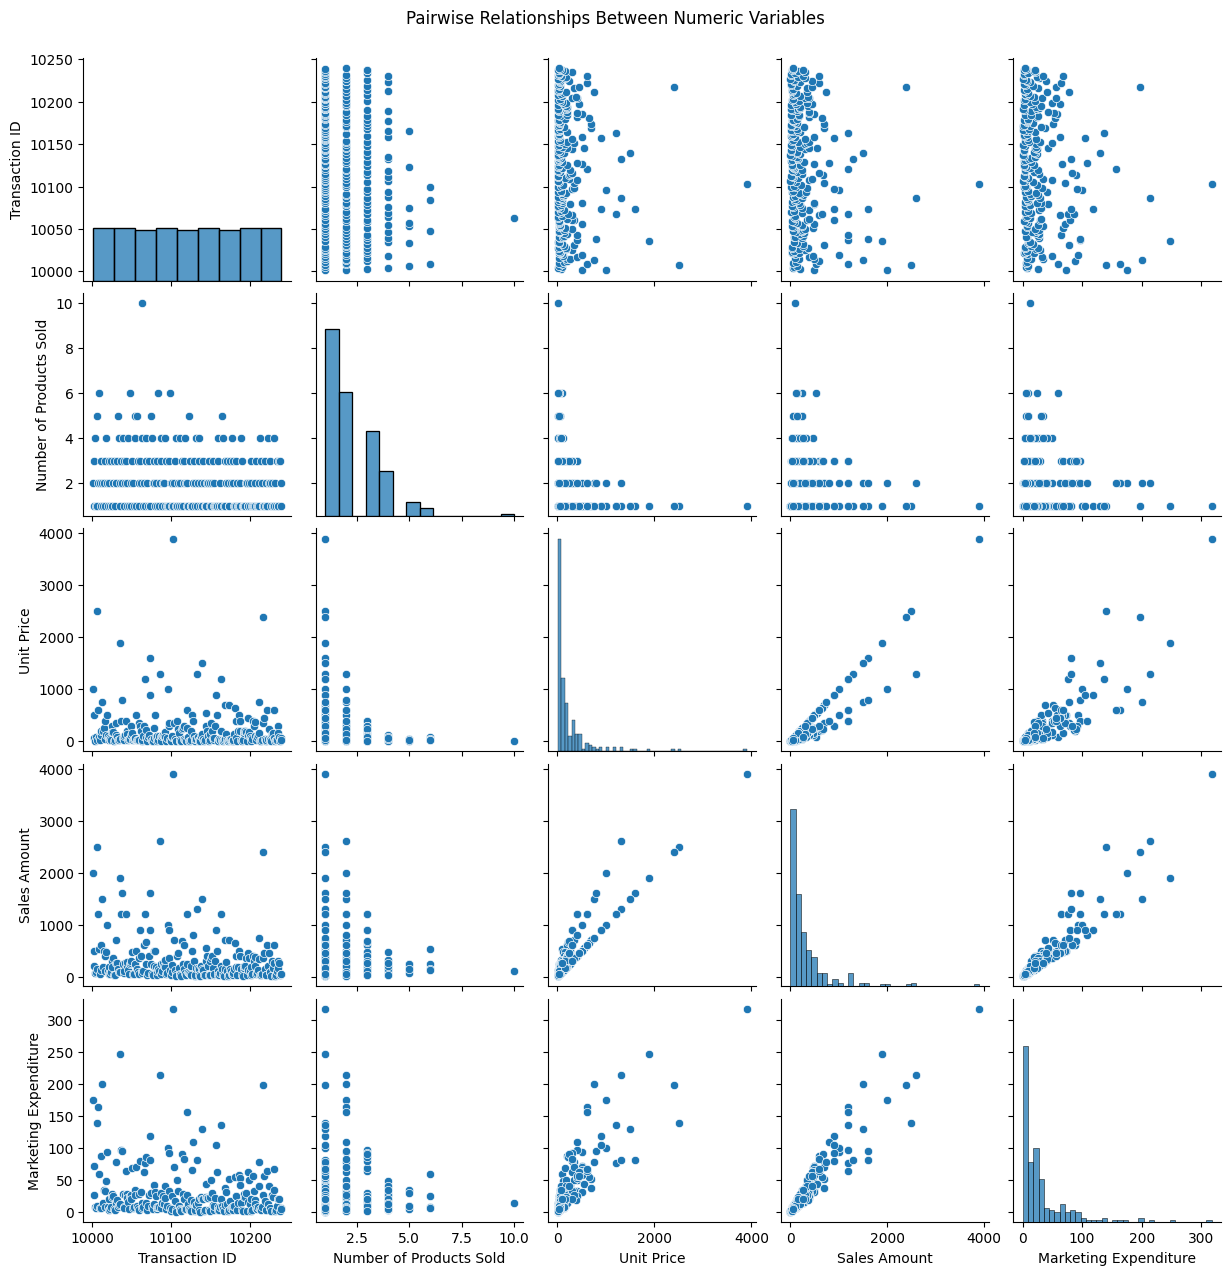

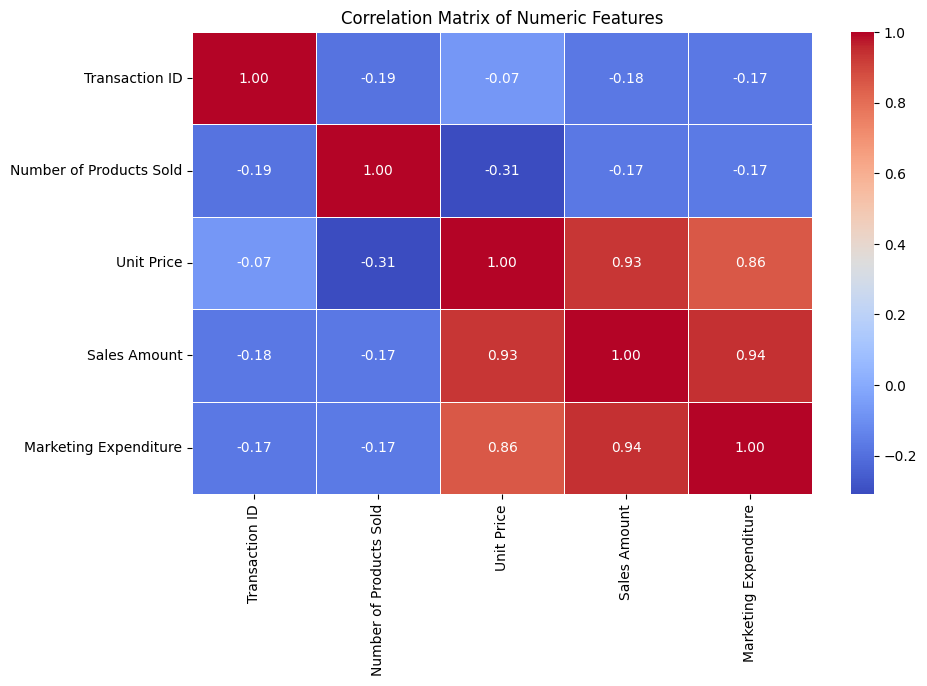

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# 🧹 Select only numeric columns for plotting
numeric_df = df.select_dtypes(include='number')

# 📊 Pairplot (only for numeric features)
sns.pairplot(numeric_df)
plt.suptitle("Pairwise Relationships Between Numeric Variables", y=1.02)
plt.show()

# 🔥 Correlation matrix heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numeric Features")
plt.show()


In [17]:
import numpy as np

# Feature 1: Revenue per Product
df['Revenue_per_Product'] = df['Sales Amount'] / df['Number of Products Sold']

# Feature 2: Marketing Efficiency
df['Marketing_Efficiency'] = df['Sales Amount'] / df['Marketing Expenditure']

# Feature 3: Price-Marketing Ratio
df['Price_Marketing_Ratio'] = df['Unit Price'] / df['Marketing Expenditure']

# Feature 4: Log Transforms
df['Log_Sales'] = np.log1p(df['Sales Amount'])
df['Log_Unit_Price'] = np.log1p(df['Unit Price'])
df['Log_Marketing'] = np.log1p(df['Marketing Expenditure'])
df['Log_Products_Sold'] = np.log1p(df['Number of Products Sold'])

# Optional: Display the first few rows
df.head()


,Transaction ID,Date,Product Category,Product Name,Number of Products Sold,Unit Price,Sales Amount,Region,Payment Method,Marketing Expenditure,Revenue_per_Product,Marketing_Efficiency,Price_Marketing_Ratio,Log_Sales,Log_Unit_Price,Log_Marketing,Log_Products_Sold
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card,174.91,999.99,11.434338,5.717169,7.601392,6.908745,5.169973,1.098612
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal,72.53,499.99,6.893561,6.893561,6.216586,6.216586,4.297693,0.693147
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card,25.87,69.99,8.116351,2.705450,5.351716,4.262539,3.291010,1.386294
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card,7.03,15.99,9.098151,2.274538,4.173772,2.832625,2.083185,1.609438
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal,5.90,89.99,15.252542,15.252542,4.510750,4.510750,1.931521,0.693147


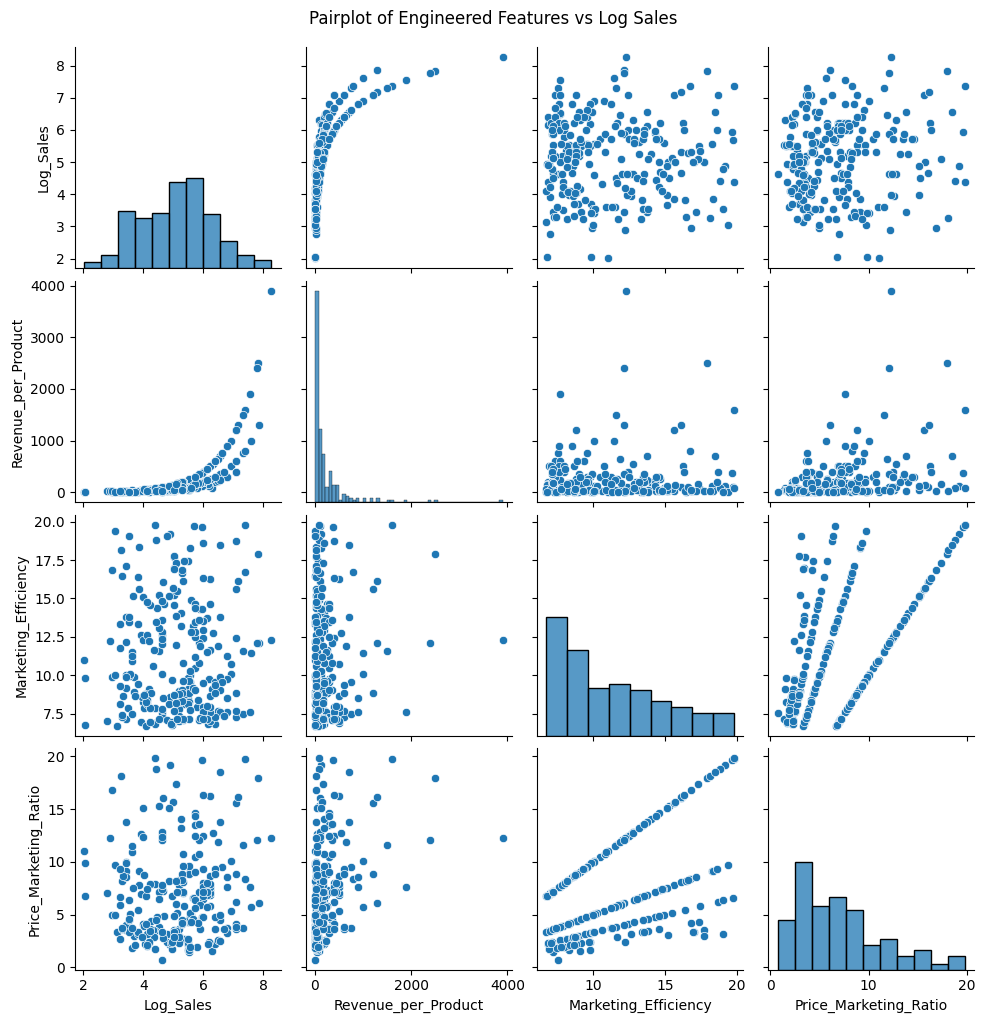

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot pairplot for engineered features
sns.pairplot(df[['Log_Sales', 'Revenue_per_Product', 'Marketing_Efficiency', 'Price_Marketing_Ratio']])
plt.suptitle("Pairplot of Engineered Features vs Log Sales", y=1.02)
plt.show()


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Define features and target
X = df[['Revenue_per_Product', 'Marketing_Efficiency', 'Price_Marketing_Ratio',
        'Log_Unit_Price', 'Log_Marketing', 'Log_Products_Sold']]
y = df['Log_Sales']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Output results
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)
print("R² Score:", r2)
print("RMSE:", rmse)


Intercept: -0.5584548724962728
Coefficients: [-3.61786536e-05  2.40874549e-02 -1.64272305e-02  8.47591519e-01
  1.82384109e-01  1.09137971e+00]
R² Score: 0.9992365718945464
RMSE: 0.031793482895855825


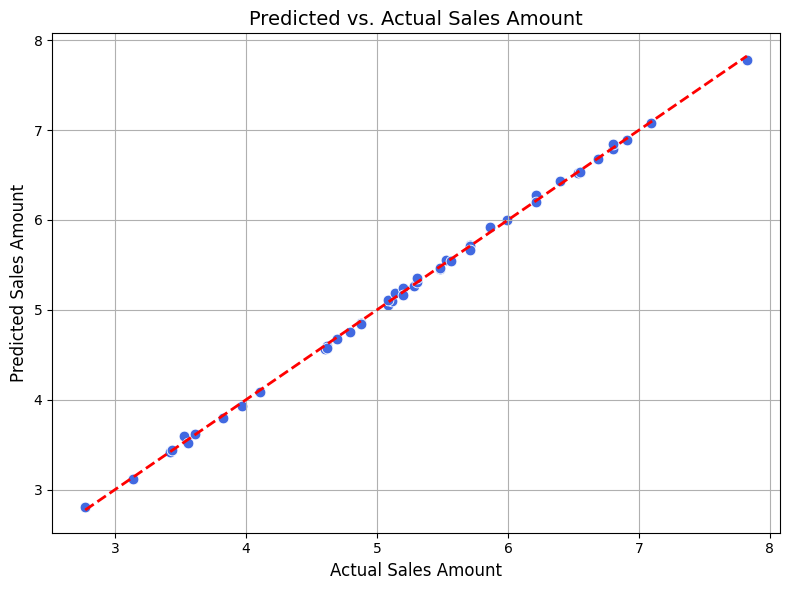

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predicted vs Actual plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='royalblue', s=60)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel("Actual Sales Amount", fontsize=12)
plt.ylabel("Predicted Sales Amount", fontsize=12)
plt.title("Predicted vs. Actual Sales Amount", fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()
